In [2]:
# import the data
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the count of each country
df.country.value_counts()

Congo, Dem. Rep.                  1
Myanmar                           1
Comoros                           1
Mali                              1
St. Vincent and the Grenadines    1
Chad                              1
Burundi                           1
Nigeria                           1
Tunisia                           1
Iraq                              1
Fiji                              1
Nepal                             1
Guyana                            1
Bulgaria                          1
Egypt                             1
Maldives                          1
Malawi                            1
Chile                             1
Grenada                           1
Jamaica                           1
Colombia                          1
Senegal                           1
United Kingdom                    1
Congo, Rep.                       1
Cameroon                          1
Suriname                          1
Iceland                           1
Peru                        

In [4]:
# Finding the shape of the data (number of rows and columns)
df.shape

(167, 10)

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# info of the columns like dtypes,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# converting expotrs, imports and health column from percentage values to float
df['exports'] = (df['exports']/100)*df['gdpp']
df['imports']=(df['imports']/100)*df['gdpp']
df['health']=(df['health']/100)*df['gdpp']
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [9]:
# Popping out the country column from the data
y=df.pop('country')

In [10]:
# Finding number of nulls for columns
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### 2. Outlier treatment

In [11]:
# finding outliers
df=df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
df.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


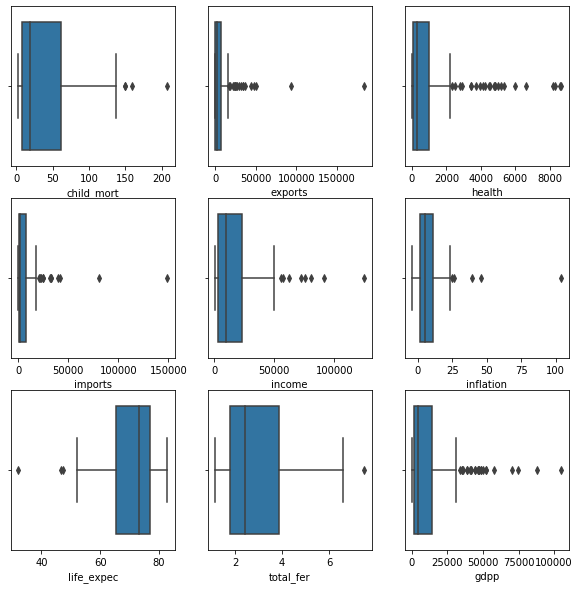

In [12]:
# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.subplot(3,3,3)
sns.boxplot(df['health'])
plt.subplot(3,3,4)
sns.boxplot(df['imports'])
plt.subplot(3,3,5)
sns.boxplot(df['income'])
plt.subplot(3,3,6)
sns.boxplot(df['inflation'])
plt.subplot(3,3,7)
sns.boxplot(df['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(df['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(df['gdpp'])

In [13]:
# Treating outliers
q1=df['child_mort'].quantile(0.00)
q4=df['child_mort'].quantile(0.99)
df=df[(df['child_mort']>=q1) & (df['child_mort']<=q4)]

q1=df['exports'].quantile(0.00)
q4=df['exports'].quantile(0.99)
df=df[(df['exports']>=q1) & (df['exports']<=q4)]

q1=df['health'].quantile(0.00)
q4=df['health'].quantile(0.99)
df=df[(df['health']>=q1) & (df['health']<=q4)]

q1=df['imports'].quantile(0.00)
q4=df['imports'].quantile(0.99)
df=df[(df['imports']>=q1) & (df['imports']<=q4)]

q1=df['income'].quantile(0.00)
q4=df['income'].quantile(0.99)
df=df[(df['income']>=q1) & (df['income']<=q4)]

q1=df['inflation'].quantile(0.00)
q4=df['inflation'].quantile(0.99)
df=df[(df['inflation']>=q1) & (df['inflation']<=q4)]

q1=df['gdpp'].quantile(0.00)
q4=df['gdpp'].quantile(0.99)
df=df[(df['gdpp']>=q1) & (df['gdpp']<=q4)]

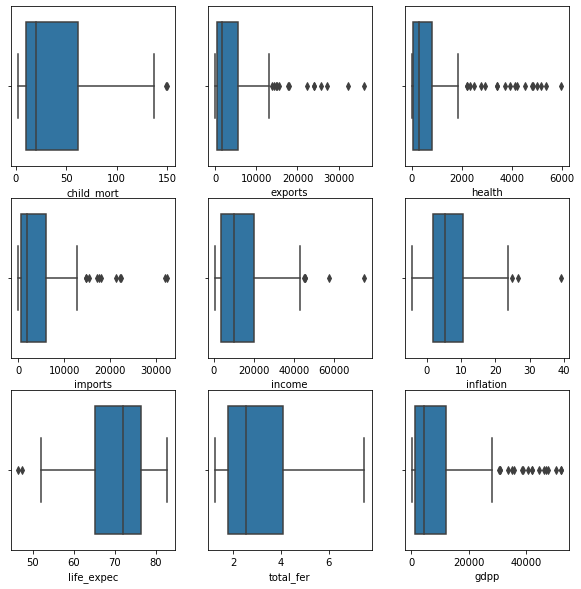

In [14]:
# Finding outliers by visualization using 'BOXPLOTS'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(df['exports'])
plt.subplot(3,3,3)
sns.boxplot(df['health'])
plt.subplot(3,3,4)
sns.boxplot(df['imports'])
plt.subplot(3,3,5)
sns.boxplot(df['income'])
plt.subplot(3,3,6)
sns.boxplot(df['inflation'])
plt.subplot(3,3,7)
sns.boxplot(df['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(df['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(df['gdpp'])

In [15]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [16]:
df.shape

(153, 9)

In [17]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df)

In [18]:
df1[:4,:4]

array([[ 1.4190922 , -0.67007982, -0.5897055 , -0.69893552],
       [-0.58405583, -0.50567641, -0.41317729, -0.40326043],
       [-0.2928373 , -0.42008224, -0.47716573, -0.50309123],
       [ 2.20293273, -0.34668975, -0.54386017, -0.48372511]])

In [19]:
# maximun value
df1.max()

4.784496461345238

In [20]:
# Finding the variance of each column
100*df.var()/sum(df.var())

child_mort    3.094600e-04
exports       1.007457e+01
health        3.756449e-01
imports       7.933520e+00
income        4.317575e+01
inflation     1.084804e-05
life_expec    1.544869e-05
total_fer     5.276006e-07
gdpp          3.844018e+01
dtype: float64

In [21]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca=PCA(random_state=42)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.components_

array([[-0.3140561 ,  0.35765828,  0.35402695,  0.36695996,  0.37300037,
        -0.15974019,  0.33930899, -0.2986964 ,  0.38007669],
       [ 0.49986179,  0.32524748,  0.24821799,  0.27165534,  0.15892397,
         0.13449061, -0.36476592,  0.52032823,  0.24860266],
       [-0.1484672 ,  0.0844332 , -0.122045  , -0.02273771,  0.19803024,
         0.94817761,  0.11689081, -0.05786486, -0.01216499],
       [-0.03201104,  0.4852042 , -0.59910401,  0.43062384,  0.04183951,
        -0.11340666, -0.20045008, -0.15693053, -0.3738591 ],
       [ 0.01745058, -0.0913332 ,  0.16394438, -0.11538738,  0.12988988,
         0.05714654, -0.73529188, -0.61066801,  0.13211753],
       [ 0.09674624, -0.06710637, -0.38591657, -0.41086995,  0.77347676,
        -0.19467105,  0.03129425,  0.12293398,  0.12702747],
       [-0.78549703, -0.01966561,  0.00898234, -0.00589078,  0.01911007,
        -0.04615325, -0.39504147,  0.4704638 ,  0.05101996],
       [ 0.04055259, -0.64215499, -0.32344998,  0.59019454,  0

In [23]:
pca.explained_variance_ratio_

array([0.65533722, 0.15334543, 0.10042449, 0.03985705, 0.02001271,
       0.01926572, 0.00926382, 0.00145676, 0.00103679])

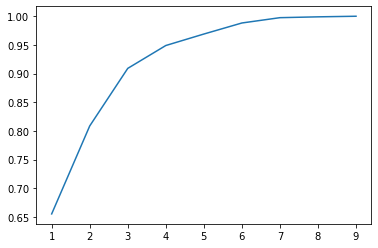

In [24]:
# Plotting the scree plot
var_cumm=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumm)+1,),var_cumm)

In [25]:
# performing dimentionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=4)

In [26]:
# Transform the data
df_pca=pca_final.fit_transform(df1)
df_pca.shape

(153, 4)

In [36]:
# Creating a dataframe with PC's obtained
df_pca2=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4'])
df_pca2.head()

,PC1,PC2,PC3,PC4
0,-2.963562,1.470368,-0.341024,0.068586
1,-0.007975,-1.609026,-0.179953,-0.035654
2,-0.542104,-0.794967,1.393593,0.268362
3,-3.001812,2.340129,1.445621,0.298847
4,1.221350,-0.804278,-0.468334,-0.308608


In [37]:
df_pca2.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
dtype: int64

In [38]:
# Adding country column to the principal components
#df_pca3= pd.concat([df_pca2,y],axis=1)
#df_pca3.head()

In [39]:
#df_pca3 = df_pca3[['country', 'PC1', 'PC2', 'PC3', 'PC4']]

In [40]:
#df_pca3.head()

In [31]:
#df_pca3.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [41]:
df_pca2.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
dtype: int64

In [32]:
# Hopkins statistic
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
# Checking hopkins measure
hopkins(df_pca2)

0.835645232291339

In [44]:
# For performing clustering we need to drop the country column
df3 = df_pca3.drop('country', axis = 1)
df3.head()

,PC1,PC2,PC3,PC4
0,-2.963562,1.470368,-0.341024,0.068586
1,-0.007975,-1.609026,-0.179953,-0.035654
2,-0.542104,-0.794967,1.393593,0.268362
3,-3.001812,2.340129,1.445621,0.298847
4,1.221350,-0.804278,-0.468334,-0.308608


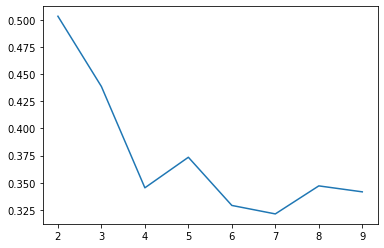

In [45]:
# silhouette score plot
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    ss.append([k,silhouette_score(df3,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

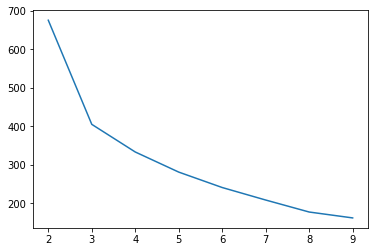

In [46]:
# Elbow curve method
ssd=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(df3)
    ssd.append([k,kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

In [47]:
# performing kmeans using k=3
model1_kmean= KMeans(n_clusters=3, random_state=0)
model1_kmean.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [48]:
df_pca2.columns

Index(['PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [49]:
# Adding clusterID to the PCs data
data_km=pd.concat([df_pca3.reset_index().drop('index',axis=1),pd.Series(model1_kmean.labels_).reset_index().drop('index',axis=1)],axis=1)
data_km.columns=['country','PC1','PC2','PC3','PC4','ClusterID']
data_km.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.963562,1.470368,-0.341024,0.068586,0.0
1,Albania,-0.007975,-1.609026,-0.179953,-0.035654,2.0
2,Algeria,-0.542104,-0.794967,1.393593,0.268362,2.0
3,Angola,-3.001812,2.340129,1.445621,0.298847,0.0
4,Antigua and Barbuda,1.221350,-0.804278,-0.468334,-0.308608,2.0


In [50]:
# Checking the count of the clusters that are formed
data_km['ClusterID'].value_counts()

2.0    80
0.0    45
1.0    28
Name: ClusterID, dtype: int64